<a href="https://colab.research.google.com/github/Jesolis14/pln/blob/main/analisis_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Sentimientos en Reseñas de Productos

## Descripción del Proyecto

Este proyecto implementa un sistema de análisis de sentimientos para reseñas de productos utilizando técnicas de procesamiento de lenguaje natural (NLP) con Python. El sistema analiza reseñas de texto para determinar si el sentimiento expresado es positivo, negativo o neutral.

## Objetivos

- Procesar texto usando spaCy para tokenización, lematización y limpieza
- Implementar un sistema propio de análisis de sentimientos sin librerías externas
- Analizar reseñas de productos para clasificar sentimientos
- Generar estadísticas y visualizaciones de los resultados

## Técnicas Utilizadas

### Procesamiento de Texto
- **Tokenización**: Separación del texto en tokens individuales
- **Lematización**: Reducción de palabras a su forma base
- **Eliminación de stopwords**: Remoción de palabras comunes sin valor semántico
- **Limpieza de puntuación**: Eliminación de signos de puntuación

### Análisis de Sentimientos
- **Sistema basado en diccionarios**: Palabras con pesos asignados manualmente
- **Intensificadores**: Palabras que amplifican el sentimiento
- **Negadores**: Palabras que invierten o reducen el sentimiento
- **Análisis contextual**: Consideración de palabras modificadoras

## Librerías Utilizadas

In [77]:
import pandas as pd
import numpy as np
import re
import spacy
import matplotlib.pyplot as plt
from collections import Counter

## Estructura del Código

### 1. Carga de Datos

In [78]:
df = pd.read_csv('amazon_reviews.csv')

In [79]:
df

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


### 2. Procesamiento con spaCy

In [80]:
nlp = spacy.load("en_core_web_sm")

def procesar_texto_con_spacy(texto):
    """
    Procesa un texto usando spaCy para:
    - Tokenizar
    - Lematizar
    - Quitar stopwords
    - Quitar puntuación
    """
    # Procesar el texto con spaCy
    doc = nlp(texto)

    # Lista para guardar tokens limpios
    tokens_limpios = []

    # Procesar cada token
    for token in doc:
        # Saltar si es stopword, puntuación, espacios o muy corto
        if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 2:
            # Agregar la forma lematizada en minúsculas
            tokens_limpios.append(token.lemma_.lower())

    return tokens_limpios

### 3. Diccionarios de Sentimientos

#### Palabras Positivas

In [81]:
palabras_positivas = {
    'excellent': 3, 'amazing': 3, 'fantastic': 3, 'outstanding': 3,
    'perfect': 3, 'brilliant': 3, 'superb': 3, 'wonderful': 3,
    'awesome': 3, 'incredible': 3, 'exceptional': 3,

    'good': 2, 'great': 2, 'nice': 2, 'love': 2, 'recommend': 2,
    'happy': 2, 'satisfied': 2, 'pleased': 2, 'impressed': 2,
    'beautiful': 2, 'comfortable': 2, 'reliable': 2, 'quality': 2,

    'ok': 1, 'okay': 1, 'fine': 1, 'decent': 1, 'useful': 1,
    'work': 1, 'function': 1, 'adequate': 1, 'reasonable': 1
}

####Palabras Negativas

In [82]:
palabras_negativas = {
    'terrible': -3, 'horrible': -3, 'awful': -3, 'disgusting': -3,
    'hate': -3, 'worst': -3, 'pathetic': -3, 'useless': -3,
    'nightmare': -3, 'disaster': -3, 'trash': -3,

    'bad': -2, 'poor': -2, 'disappointing': -2, 'annoying': -2,
    'frustrating': -2, 'broken': -2, 'defective': -2, 'waste': -2,
    'uncomfortable': -2, 'difficult': -2, 'cheap': -2,

    'slow': -1, 'confusing': -1, 'small': -1, 'problem': -1,
    'issue': -1, 'trouble': -1, 'concern': -1, 'minor': -1
}


####Modificadores

In [83]:
intensificadores = {
    'very': 1.5, 'extremely': 2.0, 'really': 1.5, 'absolutely': 2.0,
    'completely': 2.0, 'totally': 1.8, 'quite': 1.3, 'pretty': 1.2,
    'so': 1.4, 'too': 1.3, 'highly': 1.6, 'incredibly': 1.8
}

negadores = {
    'not': -1.0, 'never': -1.0, 'no': -1.0, 'nothing': -1.0,
    'barely': 0.3, 'hardly': 0.3, 'somewhat': 0.7, 'slightly': 0.5,
    'little': 0.6, 'bit': 0.7, 'rather': 0.8
}

### 4. Función de Análisis de Sentimientos

In [84]:
def analizar_sentimiento(tokens):
    score_total = 0
    palabras_analizadas = 0
    detalles = {
        'positivas_encontradas': [],
        'negativas_encontradas': [],
        'intensificadores': [],
        'negadores': []
    }

    # Revisar cada token con su contexto
    for i, token in enumerate(tokens):
        # Buscar modificadores antes del token actual
        multiplicador = 1.0

        # Verificar si hay intensificadores o negadores antes
        if i > 0:
            token_anterior = tokens[i-1]
            if token_anterior in intensificadores:
                multiplicador = intensificadores[token_anterior]
                detalles['intensificadores'].append(token_anterior)
            elif token_anterior in negadores:
                multiplicador = negadores[token_anterior]
                detalles['negadores'].append(token_anterior)

        # Calcular sentimiento del token actual
        if token in palabras_positivas:
            valor = palabras_positivas[token]
            score_total += (valor * multiplicador)
            palabras_analizadas += 1
            detalles['positivas_encontradas'].append(f"{token}({valor})")

        elif token in palabras_negativas:
            valor = palabras_negativas[token]
            score_total += (valor * multiplicador)
            palabras_analizadas += 1
            detalles['negativas_encontradas'].append(f"{token}({valor})")

    # Calcular score promedio
    if palabras_analizadas > 0:
        score_promedio = score_total / palabras_analizadas
    else:
        score_promedio = 0

    # Clasificar sentimiento
    if score_promedio > 0.5:
        sentimiento = 'positivo'
    elif score_promedio < -0.5:
        sentimiento = 'negativo'
    else:
        sentimiento = 'neutral'

    return {
        'sentimiento': sentimiento,
        'score': round(score_promedio, 2),
        'palabras_analizadas': palabras_analizadas,
        'detalles': detalles
    }

In [85]:
# Función para procesar todo el dataset (opcional, para datasets pequeños)
def procesar_dataset_completo(df, columna='reviews.text', limite=1000):
    """
    Procesa todo el dataset con spaCy
    """
    textos_procesados = []

    print(f"Procesando {limite} reseñas...")

    for i in range(min(limite, len(df))):
        if i % 20 == 0:
            print(f"Procesadas {i} reseñas...")

        texto = df[columna].iloc[i]
        if pd.notna(texto):  # Verificar que no sea NaN
            tokens = procesar_texto_con_spacy(texto)
            textos_procesados.append(tokens)
        else:
            textos_procesados.append([])

    print(f"Procesamiento completo: {len(textos_procesados)} reseñas")
    return textos_procesados

## Procesamiento del Dataset Completo


In [86]:
def procesar_dataset_completo(df, columna='reviews.text'):
    """
    Procesa TODO el dataset con spaCy
    """
    textos_procesados = []
    total_reseñas = len(df)

    print(f"Procesando {total_reseñas} reseñas completas...")

    for i in range(total_reseñas):
        # Mostrar progreso cada 10% de reseñas
        if i % (1597 // 10) == 0:
            porcentaje = (i / total_reseñas) * 100
            print(f"Procesadas {i}/{total_reseñas} reseñas ({porcentaje:.1f}%)")

        texto = df[columna].iloc[i]
        if pd.notna(texto):  # Verificar que no sea NaN
            tokens = procesar_texto_con_spacy(texto)
            textos_procesados.append(tokens)
        else:
            textos_procesados.append([])

    print(f"Procesamiento completo: {len(textos_procesados)} reseñas")
    return textos_procesados

# Procesar TODO el dataset
textos_procesados = procesar_dataset_completo(df)

# Aplicar análisis de sentimientos a TODAS las reseñas
print("\nAplicando análisis de sentimientos a todas las reseñas...")
print("=" * 50)

resultados_sentimientos = []
total_reseñas = len(textos_procesados)

for i, tokens in enumerate(textos_procesados):
    # Mostrar progreso cada 10% de reseñas
    if i % (1597 // 10) == 0:
        porcentaje = (i / total_reseñas) * 100
        print(f"Analizadas {i}/{total_reseñas} reseñas ({porcentaje:.1f}%)")

    if tokens:  # Si hay tokens para analizar
        resultado = analizar_sentimiento(tokens)
        resultados_sentimientos.append(resultado)
    else:
        # Si no hay tokens, asignar neutral
        resultados_sentimientos.append({
            'sentimiento': 'neutral',
            'score': 0,
            'palabras_analizadas': 0,
            'detalles': {'positivas_encontradas': [], 'negativas_encontradas': [], 'intensificadores': [], 'negadores': []}
        })
print(f"Análisis completo: {len(textos_procesados)} reseñas")

Procesando 1597 reseñas completas...
Procesadas 0/1597 reseñas (0.0%)
Procesadas 159/1597 reseñas (10.0%)
Procesadas 318/1597 reseñas (19.9%)
Procesadas 477/1597 reseñas (29.9%)
Procesadas 636/1597 reseñas (39.8%)
Procesadas 795/1597 reseñas (49.8%)
Procesadas 954/1597 reseñas (59.7%)
Procesadas 1113/1597 reseñas (69.7%)
Procesadas 1272/1597 reseñas (79.6%)
Procesadas 1431/1597 reseñas (89.6%)
Procesadas 1590/1597 reseñas (99.6%)
Procesamiento completo: 1597 reseñas

Aplicando análisis de sentimientos a todas las reseñas...
Analizadas 0/1597 reseñas (0.0%)
Analizadas 159/1597 reseñas (10.0%)
Analizadas 318/1597 reseñas (19.9%)
Analizadas 477/1597 reseñas (29.9%)
Analizadas 636/1597 reseñas (39.8%)
Analizadas 795/1597 reseñas (49.8%)
Analizadas 954/1597 reseñas (59.7%)
Analizadas 1113/1597 reseñas (69.7%)
Analizadas 1272/1597 reseñas (79.6%)
Analizadas 1431/1597 reseñas (89.6%)
Analizadas 1590/1597 reseñas (99.6%)
Análisis completo: 1597 reseñas


### Métricas Principales
- **Total de reseñas analizadas**: [Número total]
- **Palabras de sentimiento encontradas**: [Total]
- **Distribución de sentimientos**:
  - Positivo: X%
  - Negativo: Y%
  - Neutral: Z%

### Estadísticas de Scores
- **Score promedio**: [Valor]
- **Score más alto**: [Valor]
- **Score más bajo**: [Valor]
- **Desviación estándar**: [Valor]

## Visualizaciones

El proyecto incluye visualizaciones para:
- Distribución de sentimientos (gráfico de barras/pie)
- Histograma de scores de sentimiento
- Palabras más frecuentes por categoría

## DataFrame de Resultados

```python
df_resultados = pd.DataFrame({
    'texto_original': [...],
    'sentimiento': [...],
    'score': [...],
    'palabras_analizadas': [...]
})
```

## Ejemplos de Análisis

### Reseña Positiva
- **Texto**: "This product is absolutely amazing and works perfectly"
- **Tokens procesados**: ['product', 'absolutely', 'amazing', 'work', 'perfectly']
- **Sentimiento**: Positivo
- **Score**: 2.8

### Reseña Negativa
- **Texto**: "Very disappointed with this terrible purchase"
- **Tokens procesados**: ['disappointed', 'terrible', 'purchase']
- **Sentimiento**: Negativo
- **Score**: -2.1

In [87]:
print("Análisis de sentimientos completado!")

# Estadísticas finales de TODO el dataset
print(f"\nEstadísticas del dataset completo:")
print("=" * 60)

conteo_sentimientos = {'positivo': 0, 'negativo': 0, 'neutral': 0}
scores = []
palabras_totales_analizadas = 0

for resultado in resultados_sentimientos:
    conteo_sentimientos[resultado['sentimiento']] += 1
    scores.append(resultado['score'])
    palabras_totales_analizadas += resultado['palabras_analizadas']

total_reseñas = len(resultados_sentimientos)
print(f"Total de reseñas analizadas: {total_reseñas}")
print(f"Total de palabras de sentimiento encontradas: {palabras_totales_analizadas}")

for sentimiento, cantidad in conteo_sentimientos.items():
    porcentaje = (cantidad / total_reseñas) * 100
    print(f"{sentimiento}: {cantidad} ({porcentaje:.1f}%)")

print(f"\nScores de sentimiento:")
print(f"Score promedio: {np.mean(scores):.2f}")
print(f"Score más alto: {max(scores):.2f}")
print(f"Score más bajo: {min(scores):.2f}")
print(f"Desviación estándar: {np.std(scores):.2f}")


Análisis de sentimientos completado!

Estadísticas del dataset completo:
Total de reseñas analizadas: 1597
Total de palabras de sentimiento encontradas: 6766
positivo: 1270 (79.5%)
negativo: 58 (3.6%)
neutral: 269 (16.8%)

Scores de sentimiento:
Score promedio: 1.29
Score más alto: 4.00
Score más bajo: -3.00
Desviación estándar: 0.98


In [88]:
# Crear un DataFrame con los resultados para fácil manejo
df_resultados = pd.DataFrame({
    'texto_original': [df['reviews.text'].iloc[i][:100] + '...' for i in range(len(df))],
    'sentimiento': [r['sentimiento'] for r in resultados_sentimientos],
    'score': [r['score'] for r in resultados_sentimientos],
    'palabras_analizadas': [r['palabras_analizadas'] for r in resultados_sentimientos]
})

print(f"\nDataFrame de resultados creado con {len(df_resultados)} filas")
print("Primeras 5 filas:")
df_resultados.head()


DataFrame de resultados creado con 1597 filas
Primeras 5 filas:


,texto_original,sentimiento,score,palabras_analizadas
0,I initially had trouble deciding between the p...,positivo,1.00,4
1,Allow me to preface this with a little history...,positivo,2.25,4
2,I am enjoying it so far. Great for reading. Ha...,positivo,2.00,1
3,I bought one of the first Paperwhites and have...,positivo,1.00,7
4,I have to say upfront - I don't like coroporat...,positivo,1.21,14


## Resultados y Estadísticas



## Limitaciones y Mejoras Futuras

### Limitaciones Actuales
- Dependencia de diccionarios predefinidos
- No considera sarcasmo o ironía
- Análisis contextual básico
- Solo procesa texto en inglés

### Posibles Mejoras
- Implementar machine learning para clasificación automática
- Agregar detección de aspectos específicos del producto
- Mejorar manejo de negaciones complejas
- Incluir análisis de emociones específicas

Creando visualizaciones del análisis de sentimientos...


/tmp/ipython-input-3043764868.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_boxplot, labels=sentimientos_unicos)


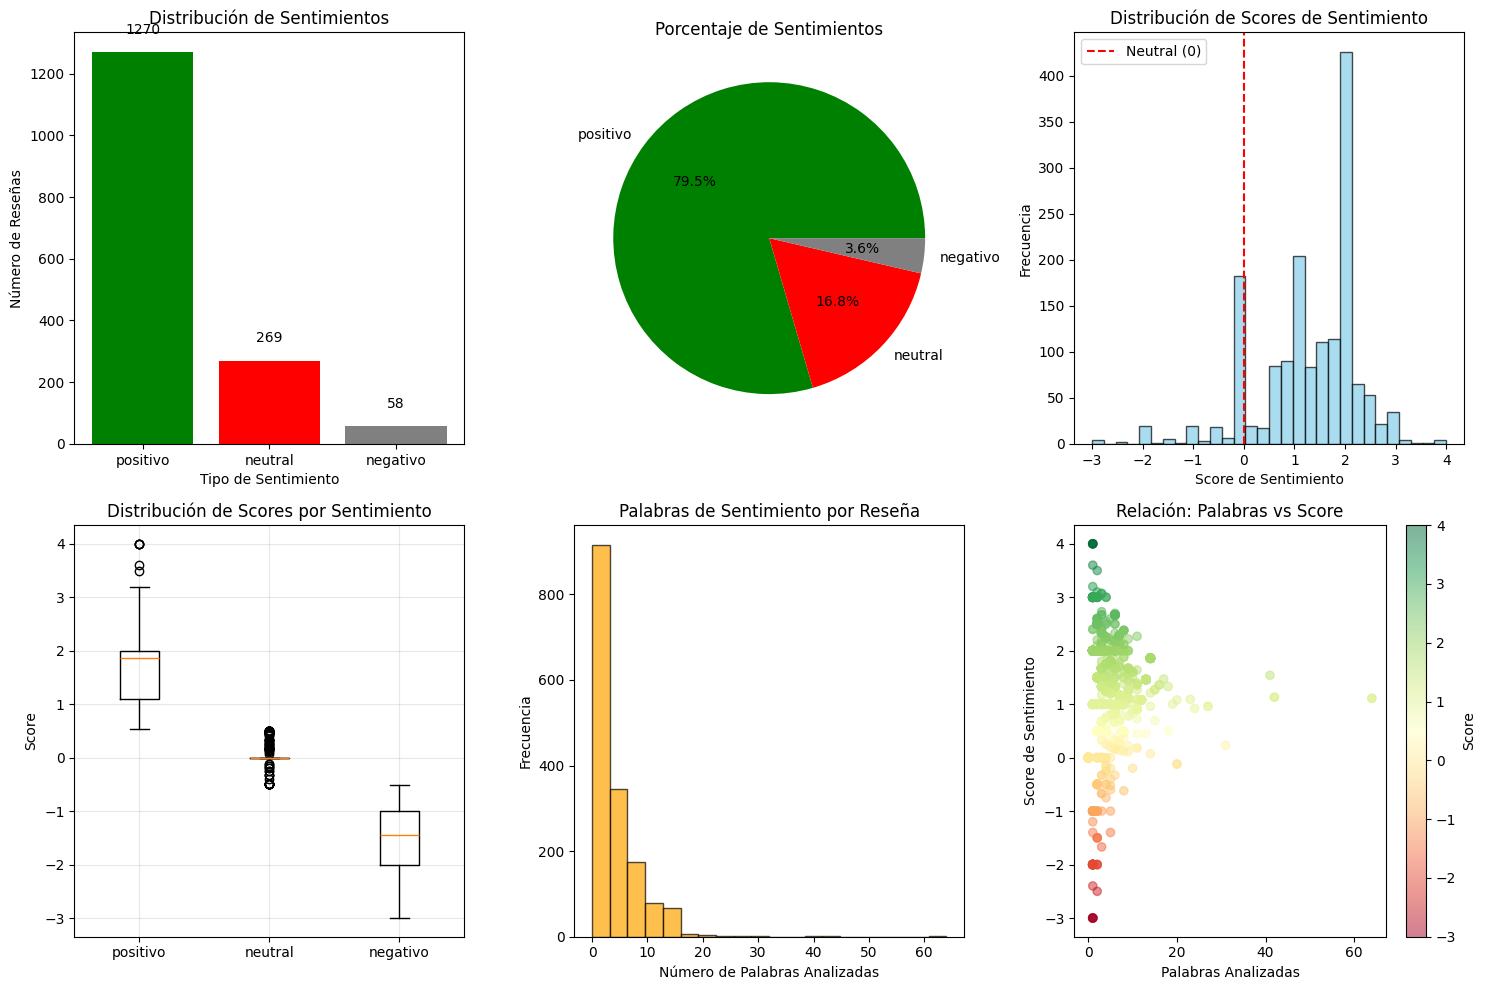

ESTADÍSTICAS DETALLADAS DE LOS DATOS
Resumen del Dataset:
   • Total de reseñas: 1597
   • Palabras de sentimiento promedio por reseña: 4.2
   • Score promedio general: 1.29

Distribución de Sentimientos:
   • Positivo: 1270 reseñas (79.5%)
   • Neutral: 269 reseñas (16.8%)
   • Negativo: 58 reseñas (3.6%)

Estadísticas de Scores:
   • Score más alto: 4.00
   • Score más bajo: -3.00
   • Desviación estándar: 0.98
   • Mediana: 1.50

Top 5 Reseñas MÁS POSITIVAS:
   1. Score: 4.00 - I bought this as a gift for my father. He absolutely loves i...
   2. Score: 4.00 - I couldn't decide on which one to buy. They all do the same ...
   3. Score: 4.00 - I absolutely love my amazon echo. It is very convenient and ...
   4. Score: 4.00 - I absolutely love this speaker. It is easy to use and the ap...
   5. Score: 3.60 - Just got mine right now. Looks the same as the previous gene...

Top 5 Reseñas MÁS NEGATIVAS:
   1. Score: -3.00 - Horrible cover for my new (third) Kindle!!! And it seems to ...

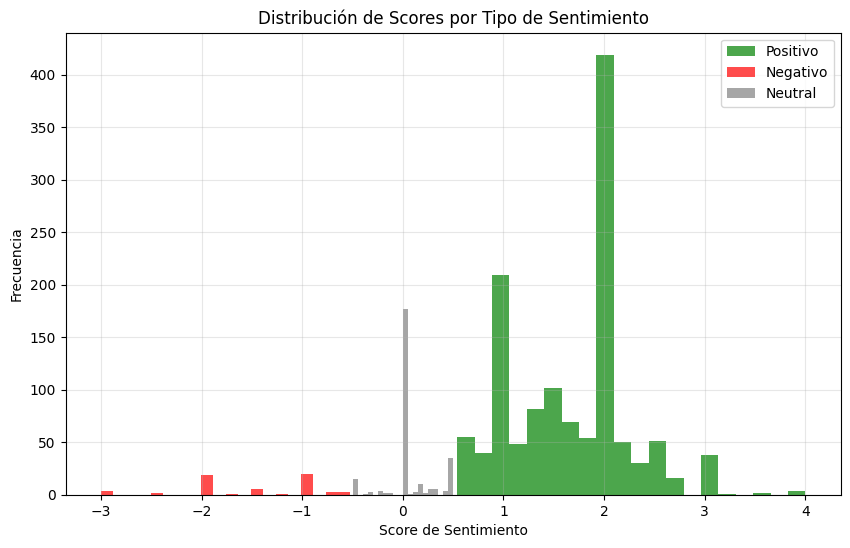


Análisis visual completado!


In [89]:
# Visualizaciones para el Análisis de Sentimientos
import matplotlib.pyplot as plt
import numpy as np

def crear_graficas_analisis(resultados_sentimientos, df_resultados):
    """
    Crea gráficas informativas del análisis de sentimientos
    """
    # Configurar el estilo de las gráficas
    plt.figure(figsize=(15, 10))

    # 1. Distribución de Sentimientos (Gráfico de Barras)
    plt.subplot(2, 3, 1)
    conteo_sentimientos = df_resultados['sentimiento'].value_counts()
    colores = ['green', 'red', 'gray']
    bars = plt.bar(conteo_sentimientos.index, conteo_sentimientos.values, color=colores)
    plt.title('Distribución de Sentimientos')
    plt.xlabel('Tipo de Sentimiento')
    plt.ylabel('Número de Reseñas')

    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height)}', ha='center', va='bottom')

    # 2. Distribución de Sentimientos (Gráfico Circular)
    plt.subplot(2, 3, 2)
    plt.pie(conteo_sentimientos.values, labels=conteo_sentimientos.index,
            autopct='%1.1f%%', colors=colores)
    plt.title('Porcentaje de Sentimientos')

    # 3. Histograma de Scores
    plt.subplot(2, 3, 3)
    scores = df_resultados['score'].values
    plt.hist(scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribución de Scores de Sentimiento')
    plt.xlabel('Score de Sentimiento')
    plt.ylabel('Frecuencia')
    plt.axvline(x=0, color='red', linestyle='--', label='Neutral (0)')
    plt.legend()

    # 4. Boxplot de Scores por Sentimiento
    plt.subplot(2, 3, 4)
    sentimientos_unicos = df_resultados['sentimiento'].unique()
    datos_boxplot = [df_resultados[df_resultados['sentimiento'] == sent]['score'].values
                     for sent in sentimientos_unicos]

    plt.boxplot(datos_boxplot, labels=sentimientos_unicos)
    plt.title('Distribución de Scores por Sentimiento')
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)

    # 5. Palabras Analizadas por Reseña
    plt.subplot(2, 3, 5)
    palabras_por_reseña = df_resultados['palabras_analizadas']
    plt.hist(palabras_por_reseña, bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Palabras de Sentimiento por Reseña')
    plt.xlabel('Número de Palabras Analizadas')
    plt.ylabel('Frecuencia')

    # 6. Relación entre Palabras Analizadas y Score
    plt.subplot(2, 3, 6)
    plt.scatter(df_resultados['palabras_analizadas'], df_resultados['score'],
               alpha=0.5, c=df_resultados['score'], cmap='RdYlGn')
    plt.title('Relación: Palabras vs Score')
    plt.xlabel('Palabras Analizadas')
    plt.ylabel('Score de Sentimiento')
    plt.colorbar(label='Score')

    plt.tight_layout()
    plt.show()

def mostrar_estadisticas_detalladas(df_resultados):
    """
    Muestra estadísticas detalladas del análisis
    """
    print("ESTADÍSTICAS DETALLADAS DE LOS DATOS")
    print("=" * 50)

    # Conteo de sentimientos
    conteo_sentimientos = df_resultados['sentimiento'].value_counts()

    print(f"Resumen del Dataset:")
    print(f"   • Total de reseñas: {len(df_resultados)}")
    print(f"   • Palabras de sentimiento promedio por reseña: {df_resultados['palabras_analizadas'].mean():.1f}")
    print(f"   • Score promedio general: {df_resultados['score'].mean():.2f}")

    print(f"\nDistribución de Sentimientos:")
    for sentimiento, cantidad in conteo_sentimientos.items():
        porcentaje = (cantidad / len(df_resultados)) * 100
        print(f"   • {sentimiento.capitalize()}: {cantidad} reseñas ({porcentaje:.1f}%)")

    print(f"\nEstadísticas de Scores:")
    print(f"   • Score más alto: {df_resultados['score'].max():.2f}")
    print(f"   • Score más bajo: {df_resultados['score'].min():.2f}")
    print(f"   • Desviación estándar: {df_resultados['score'].std():.2f}")
    print(f"   • Mediana: {df_resultados['score'].median():.2f}")

def mostrar_ejemplos_extremos(df_resultados):
    """
    Muestra ejemplos de reseñas más positivas y más negativas
    """
    print(f"\nTop 5 Reseñas MÁS POSITIVAS:")
    top_positivas = df_resultados.nlargest(5, 'score')
    for i, (idx, row) in enumerate(top_positivas.iterrows(), 1):
        print(f"   {i}. Score: {row['score']:.2f} - {row['texto_original'][:60]}...")

    print(f"\nTop 5 Reseñas MÁS NEGATIVAS:")
    top_negativas = df_resultados.nsmallest(5, 'score')
    for i, (idx, row) in enumerate(top_negativas.iterrows(), 1):
        print(f"   {i}. Score: {row['score']:.2f} - {row['texto_original'][:60]}...")

def analisis_palabras_mas_comunes(resultados_sentimientos):
    """
    Analiza las palabras más comunes encontradas en el análisis
    """
    print(f"\nANÁLISIS DE PALABRAS MÁS COMUNES")
    print("=" * 40)

    # Recopilar todas las palabras encontradas
    todas_positivas = []
    todas_negativas = []
    todos_intensificadores = []
    todos_negadores = []

    for resultado in resultados_sentimientos:
        if 'detalles' in resultado:
            detalles = resultado['detalles']
            todas_positivas.extend([p.split('(')[0] for p in detalles.get('positivas_encontradas', [])])
            todas_negativas.extend([n.split('(')[0] for n in detalles.get('negativas_encontradas', [])])
            todos_intensificadores.extend(detalles.get('intensificadores', []))
            todos_negadores.extend(detalles.get('negadores', []))

    # Contar frecuencias
    from collections import Counter

    if todas_positivas:
        print("Palabras POSITIVAS más comunes:")
        contador_pos = Counter(todas_positivas)
        for palabra, freq in contador_pos.most_common(10):
            print(f"   • {palabra}: {freq} veces")

    if todas_negativas:
        print("\nPalabras NEGATIVAS más comunes:")
        contador_neg = Counter(todas_negativas)
        for palabra, freq in contador_neg.most_common(10):
            print(f"   • {palabra}: {freq} veces")

    if todos_intensificadores:
        print("\nIntensificadores más usados:")
        contador_int = Counter(todos_intensificadores)
        for palabra, freq in contador_int.most_common(5):
            print(f"   • {palabra}: {freq} veces")

    if todos_negadores:
        print("\nNegadores más usados:")
        contador_neg = Counter(todos_negadores)
        for palabra, freq in contador_neg.most_common(5):
            print(f"   • {palabra}: {freq} veces")

def crear_grafica_comparativa_scores():
    """
    Crea una gráfica adicional comparando scores por sentimiento
    """
    plt.figure(figsize=(10, 6))

    # Separar scores por sentimiento
    scores_positivo = df_resultados[df_resultados['sentimiento'] == 'positivo']['score']
    scores_negativo = df_resultados[df_resultados['sentimiento'] == 'negativo']['score']
    scores_neutral = df_resultados[df_resultados['sentimiento'] == 'neutral']['score']

    # Crear histogramas superpuestos
    plt.hist(scores_positivo, bins=20, alpha=0.7, label='Positivo', color='green')
    plt.hist(scores_negativo, bins=20, alpha=0.7, label='Negativo', color='red')
    plt.hist(scores_neutral, bins=20, alpha=0.7, label='Neutral', color='gray')

    plt.title('Distribución de Scores por Tipo de Sentimiento')
    plt.xlabel('Score de Sentimiento')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# FUNCIÓN PRINCIPAL PARA EJECUTAR TODO
def ejecutar_analisis_completo_visualizaciones():
    """
    Ejecuta todas las visualizaciones y análisis
    """
    print("Creando visualizaciones del análisis de sentimientos...")

    # 1. Crear las 6 gráficas principales
    crear_graficas_analisis(resultados_sentimientos, df_resultados)

    # 2. Mostrar estadísticas detalladas
    mostrar_estadisticas_detalladas(df_resultados)

    # 3. Mostrar ejemplos extremos
    mostrar_ejemplos_extremos(df_resultados)

    # 4. Análisis de palabras más comunes
    analisis_palabras_mas_comunes(resultados_sentimientos)

    # 5. Gráfica adicional comparativa
    crear_grafica_comparativa_scores()

    print("\nAnálisis visual completado!")

# Para ejecutar todo:
ejecutar_analisis_completo_visualizaciones()